Benchmarking and Plotting Vertex Cover


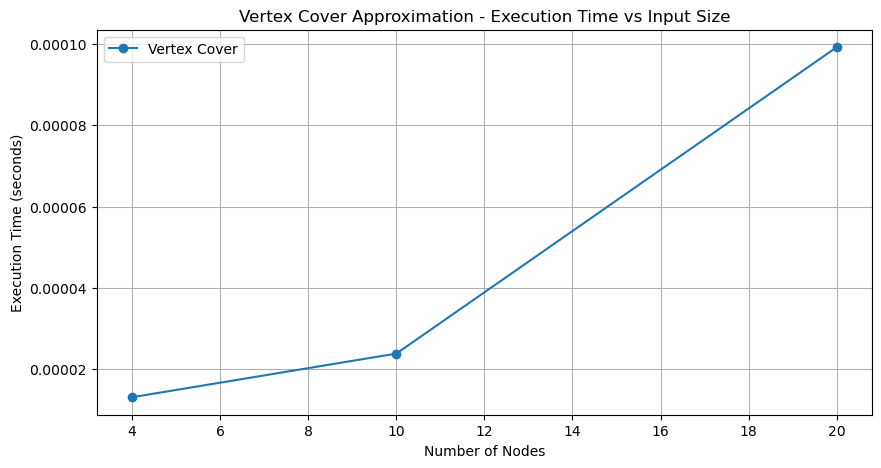


Benchmarking and Plotting TSP


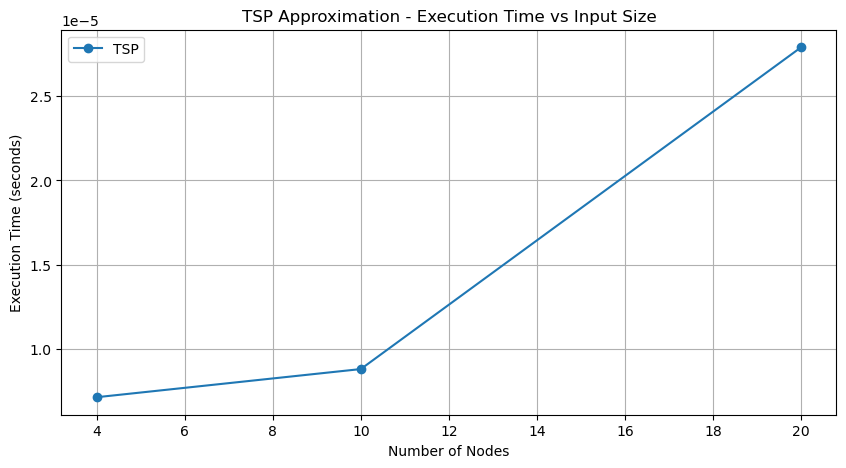


Benchmarking and Plotting Set Cover


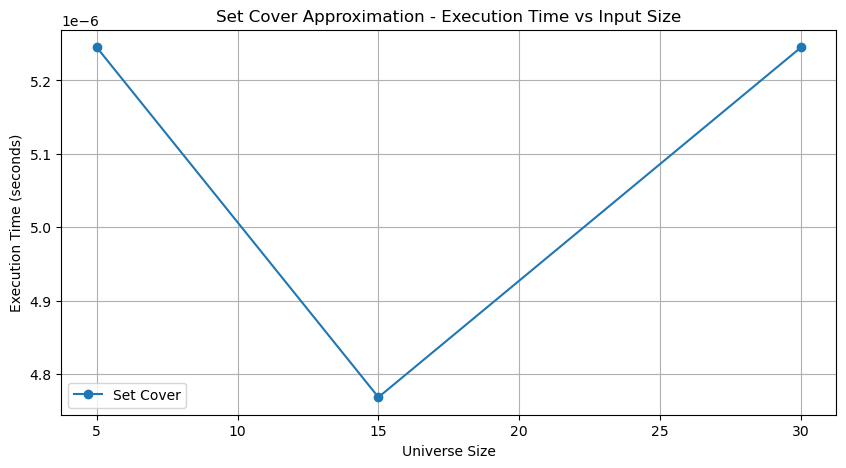


Benchmarking and Plotting Subset Sum


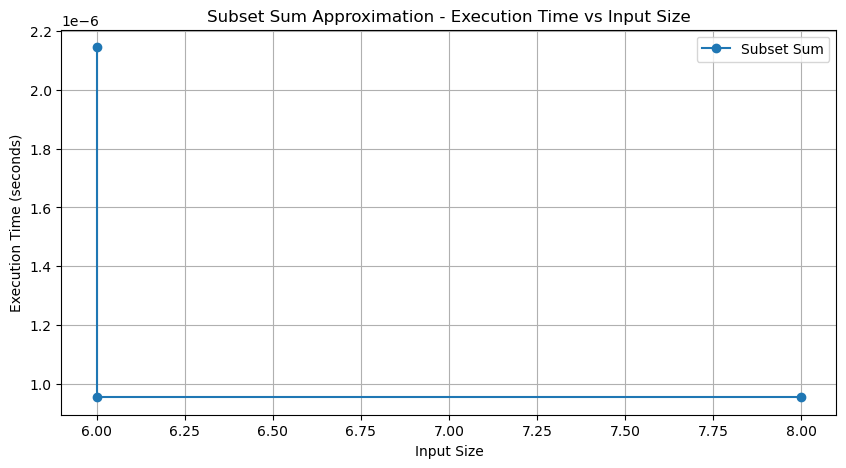

In [7]:
import random
import time
import matplotlib.pyplot as plt


# Vertex Cover Approximation (Greedy)
def vertex_cover_approx(graph):
    cover = set()
    edges = set()
    
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            if (node, neighbor) not in edges and (neighbor, node) not in edges:
                edges.add((node, neighbor))

    while edges:
        u, v = edges.pop()
        cover.add(u)
        cover.add(v)

        edges = {(x, y) for x, y in edges if x not in {u, v} and y not in {u, v}}

    return cover

# TSP Approximation (Greedy Nearest Neighbor)
def tsp_approx(graph):
    nodes = list(graph.keys())
    start_node = nodes[0]
    visited = {start_node}
    tour = [start_node]
    current_node = start_node
    
    while len(visited) < len(nodes):
        nearest_neighbor = min(graph[current_node], key=lambda x: graph[current_node][x] if x not in visited else float('inf'))
        visited.add(nearest_neighbor)
        tour.append(nearest_neighbor)
        current_node = nearest_neighbor

    tour.append(start_node)
    return tour

# Set Cover Approximation (Greedy)
def set_cover_approx(universe, subsets):
    cover = set()
    while universe:
        if not subsets:  
            break
        subset = max(subsets, key=lambda s: len(s & universe))
        cover.update(subset)  
        universe -= subset
        subsets.remove(subset)
    return cover

# Subset Sum Approximation (Greedy)
def subset_sum_approx(nums, target):
    nums.sort(reverse=True)
    current_sum = 0
    selected = []
    for num in nums:
        if current_sum + num <= target:
            selected.append(num)
            current_sum += num
    return selected if current_sum == target else None

def measure_time(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return end - start, result

# Benchmarking and plotting functions
def benchmark_and_plot_vertex_cover():
    inputs = [
        {0: {1, 2}, 1: {0, 2}, 2: {0, 1, 3}, 3: {2}},  
        {i: {j for j in range(i + 1, i + 4) if j < 10} for i in range(10)},  
        {i: {j for j in range(i + 1, i + 5) if j < 20} for i in range(20)},  
    ]

    sizes = [len(graph) for graph in inputs]
    times = []

    for graph in inputs:
        time_taken, _ = measure_time(vertex_cover_approx, graph)
        times.append(time_taken)

    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times, marker='o', label='Vertex Cover')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Vertex Cover Approximation - Execution Time vs Input Size')
    plt.legend()
    plt.grid()
    plt.show()

def benchmark_and_plot_tsp():
    inputs = [
        {0: {1: 10, 2: 15, 3: 20}, 1: {0: 10, 2: 35, 3: 25}, 2: {0: 15, 1: 35, 3: 30}, 3: {0: 20, 1: 25, 2: 30}},
        {i: {j: random.randint(10, 50) for j in range(10) if j != i} for i in range(10)},
        {i: {j: random.randint(10, 50) for j in range(20) if j != i} for i in range(20)},
    ]

    sizes = [len(graph) for graph in inputs]
    times = []

    for graph in inputs:
        time_taken, _ = measure_time(tsp_approx, graph)
        times.append(time_taken)

    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times, marker='o', label='TSP')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.title('TSP Approximation - Execution Time vs Input Size')
    plt.legend()
    plt.grid()
    plt.show()

def benchmark_and_plot_set_cover():
    inputs = [
        ({1, 2, 3, 4, 5}, [{1, 2, 3}, {2, 4}, {3, 4, 5}, {5}]),
        (set(range(1, 16)), [{1, 2, 3}, {4, 5, 6}, {7, 8, 9, 10}, {11, 12, 13}, {14, 15}, {1, 15}]),
        (set(range(1, 31)), [{1, 2, 3, 4}, {5, 6, 7}, {8, 9, 10}, {11, 12, 13, 14}, {15, 16, 17}, {25, 26, 27}]),
    ]

    sizes = [len(u) for u, _ in inputs]
    times = []

    for universe, subsets in inputs:
        time_taken, _ = measure_time(set_cover_approx, universe, subsets)
        times.append(time_taken)

    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times, marker='o', label='Set Cover')
    plt.xlabel('Universe Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Set Cover Approximation - Execution Time vs Input Size')
    plt.legend()
    plt.grid()
    plt.show()

def benchmark_and_plot_subset_sum():
    inputs = [
        ([3, 34, 4, 12, 5, 2], 9),
        ([5, 10, 20, 30, 40, 50], 60),
        ([10, 20, 30, 40, 50, 60, 70, 80], 150),
    ]

    sizes = [len(nums) for nums, _ in inputs]
    times = []

    for nums, target in inputs:
        time_taken, _ = measure_time(subset_sum_approx, nums, target)
        times.append(time_taken)

    plt.figure(figsize=(10, 5))
    plt.plot(sizes, times, marker='o', label='Subset Sum')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Subset Sum Approximation - Execution Time vs Input Size')
    plt.legend()
    plt.grid()
    plt.show()

print("Benchmarking and Plotting Vertex Cover")
benchmark_and_plot_vertex_cover()

print("\nBenchmarking and Plotting TSP")
benchmark_and_plot_tsp()

print("\nBenchmarking and Plotting Set Cover")
benchmark_and_plot_set_cover()

print("\nBenchmarking and Plotting Subset Sum")
benchmark_and_plot_subset_sum()